In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [2]:
df = pd.read_csv('feedback.csv')

In [3]:
df = df.sample(frac=1, random_state=12).reset_index(drop=True)

In [4]:
df

,Passenger Feedback,class
0,The bus was spacious and had plenty of amenities,good
1,The driver was not paying attention to the ro...,bad
2,The bus was too crowded and uncomfortable,bad
3,The bus was spacious and had plenty of legroom,good
4,The journey was enjoyable and the travel time...,good
...,...,...
507,The driver was not paying attention to the ro...,bad
508,The bus was too crowded and uncomfortable,bad
509,The driver was not polite and was not helping...,bad
510,The journey was pleasant and the travel time ...,good


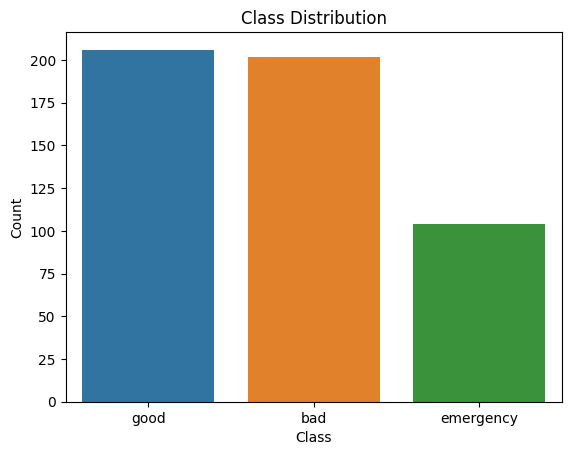

In [5]:
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [6]:
good_feedback = ' '.join(df[df['class'] == 'good']['Passenger Feedback'])
bad_feedback = ' '.join(df[df['class'] == 'bad']['Passenger Feedback'])
emergency_feedback = ' '.join(df[df['class'] == 'emergency']['Passenger Feedback'])

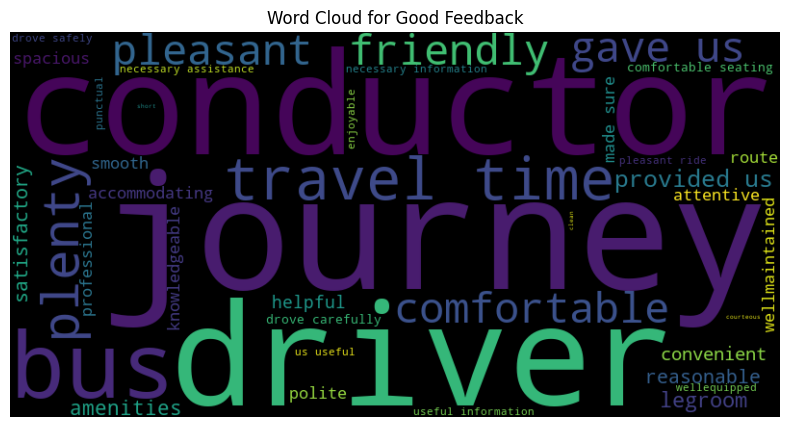

In [7]:
# Create a word cloud for good feedback
wordcloud_good = WordCloud(width=800, height=400).generate(good_feedback)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.title('Word Cloud for Good Feedback')
plt.axis('off')
plt.show()

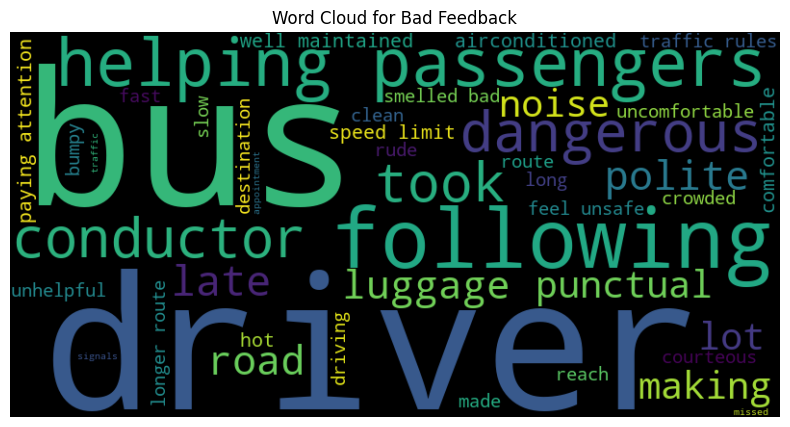

In [8]:
# Create a word cloud for bad feedback
wordcloud_bad = WordCloud(width=800, height=400).generate(bad_feedback)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.title('Word Cloud for Bad Feedback')
plt.axis('off')
plt.show()

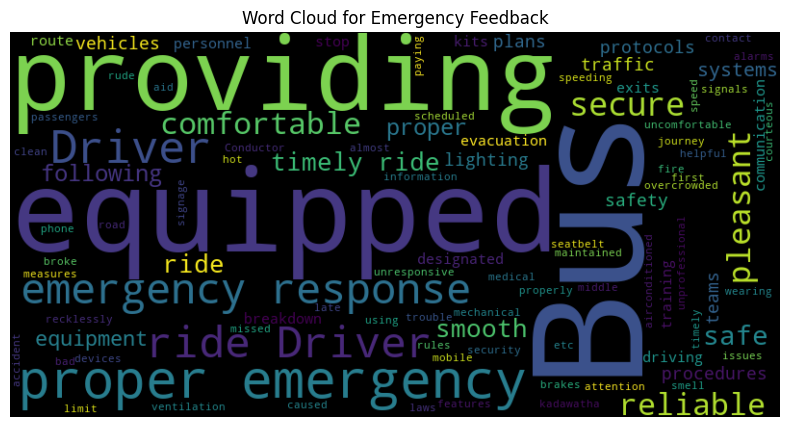

In [9]:
# Create a word cloud for Emergency feedback
wordcloud_bad = WordCloud(width=800, height=400).generate(emergency_feedback)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.title('Word Cloud for Emergency Feedback')
plt.axis('off')
plt.show()

In [10]:
# Encode class labels
class_mapping = {'good': 0, 'bad': 1, 'emergency': 2}
df['class'] = df['class'].map(class_mapping)

In [11]:
def preprocess_text(text):
    words = text.split()
    # Remove stopwords and apply stemming
    processed_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(processed_words)

df['Passenger Feedback'] = df['Passenger Feedback'].apply(preprocess_text)

In [12]:
df

,Passenger Feedback,class
0,bus spacious plenti amen,0
1,driver pay attent road danger,1
2,bus crowd uncomfort,1
3,bus spacious plenti legroom,0
4,journey enjoy travel time satisfactori,0
...,...,...
507,driver pay attent road danger,1
508,bus crowd uncomfort,1
509,driver polit help passeng,1
510,journey pleasant travel time reason,0


In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['Passenger Feedback'], df['class'], test_size=0.2, random_state=42)

In [14]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [15]:
# Create Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [16]:
# Make predictions on the test data
y_pred = clf.predict(X_test_tfidf)

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.89      1.00      0.94        39
           2       1.00      0.72      0.84        18

    accuracy                           0.95       103
   macro avg       0.96      0.91      0.93       103
weighted avg       0.96      0.95      0.95       103



In [18]:
new_feedback = "Bus broke down in the middle of the journey"
new_feedback= preprocess_text(new_feedback)

# Preprocess and vectorize the new feedback text
new_feedback = [new_feedback] 
new_feedback_tfidf = tfidf_vectorizer.transform(new_feedback)

predicted_class = clf.predict(new_feedback_tfidf)

# Map the predicted numerical class back to its label
class_mapping_inverse = {v: k for k, v in class_mapping.items()}
predicted_class_label = class_mapping_inverse[predicted_class[0]]

print(f'Predicted Class: {predicted_class_label}')


Predicted Class: emergency


In [19]:
import joblib

# Save the model to a file
filename = 'feedback_model.sav'
joblib.dump(clf, filename)


['feedback_model.sav']

In [20]:
loaded_model = joblib.load(filename)

In [21]:
type(loaded_model)

sklearn.linear_model._logistic.LogisticRegression